# An analysis of imdb scores as it relates to TV Series longevity.

The audience for this analysis is content creators, programmers, and deal makers. If one can find a relationship between imdb and series longevity, this data can inform greenlight decisions and save potentially millions of dollars on rights and production costs. 

To shed light into whether this data can inform decision makeers, it aims to answer the following questions: 
* Is there a relationship between imdb scores and a television series age? 
* Is there a relationship between a greater than average rating early in a series and its age?
* Is there a relationship between imdb scores and a series ending over time?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(11.7,8.27)})

## ETL
The three files provided by imdb are titles, episodes, and ratings. This section imports the file, performs transformations and
saves the files. Use the transformed files in the analysis to save processing time.
* Titles file (title.basics.tsv) contains movies and television title data identified by tconst.
* Episode file (title.episode.tsv) contains episode data that links to series via the parentTconst
* Ratings file (title.ratings.tsv) contains the ratings for each title linked by tconst

In [2]:
# There is an anomaly in this file that requires use of the python engine instead of C
titles = pd.read_csv('./title.basics.tsv', delimiter='\t+', encoding='ISO-8859-1', engine='python')

In [3]:
episodes = pd.read_csv('./title.episode.tsv', delimiter='\t', encoding='ISO-8859-1')

In [4]:
ratings = pd.read_csv('./title.ratings.tsv', delimiter='\t', encoding='ISO-8859-1')

For each file:
* Change the imdb null value to pandas null value
* Convert years and minutes to numeric types

In [5]:
titles = titles.replace('\\N',np.nan)
titles[["startYear", 
        "endYear", 
        "runtimeMinutes"]] = titles[["startYear", 
                                     "endYear", 
                                     "runtimeMinutes"]].apply(pd.to_numeric)

In [6]:
episodes = episodes.replace('\\N',np.nan)

In [7]:
ratings = ratings.replace('\\N', np.nan)

The group by is used to get the value for tv series and episodes. Then the data is split between series and episodes. I filtered the series by 1990 and newer to have a more manageably size dataset. I chose 1990 roughly as the Seignfeld epic, but any epic can be used (e.g., Cheers).

In [8]:
# Get list of title types to select Programs/Series and Episodes
titles[["tconst", "titleType"]].groupby('titleType').count()

,tconst
titleType,
movie,592616
short,839030
tvEpisode,6135367
tvMiniSeries,40418
tvMovie,133502
tvPilot,2
tvSeries,215381
tvShort,10353
tvSpecial,34663


In [9]:
tvSeries1990 = titles.loc[ (titles['titleType'] == "tvSeries") & (titles['startYear'] >= 1990)]
tvEpisodes = titles.loc[(titles['titleType'] == "tvEpisode")]

In [10]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1831
1,tt0000002,6.0,236
2,tt0000003,6.5,1591
3,tt0000004,6.0,153
4,tt0000005,6.2,2406


Join TV series data with the corresponding ratings

In [11]:
tvSeries1990 = tvSeries1990.merge(ratings, how='left', on='tconst')

Turn genres column, a comma separated list of genres, into a dummy binary categorical variable

In [12]:
tvSeries1990 = pd.concat([tvSeries1990,tvSeries1990['genres'].str.get_dummies(sep=',')])

In [13]:
tvSeries1990.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0080217,tvSeries,Hana no mahoutsukai Mary Bell,Hana no mahoutsukai Mary Bell,0.0,1992.0,NaN,24.0,"Adventure,Animation,Comedy",6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0087305,tvSeries,The Power of Desire,ForÃ§a de Um Desejo,0.0,1999.0,2000.0,45.0,"Drama,Romance",7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0088472,tvSeries,An Actor's Life for Me,An Actor's Life for Me,0.0,1991.0,1991.0,30.0,Comedy,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0088473,tvSeries,Adventures in Wonderland,Adventures in Wonderland,0.0,1992.0,1994.0,30.0,"Comedy,Family,Fantasy",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0088655,tvSeries,AD Police Files,AD Police Files,0.0,1990.0,1990.0,121.0,"Animation,Crime,Sci-Fi",6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merge the TV Episode dataset from the titles file with the episode data in the episodes file. This gives a complete picture of the episodes 

In [14]:
tvEpisodesFull = tvEpisodes.merge(episodes, how='inner', on='tconst')

In [15]:
tvEpisodesFull.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tvEpisode,Barnacle Bill,Barnacle Bill,0,1930.0,NaN,8.0,"Animation,Comedy,Family",tt15180956,1,2
1,tt0020829,tvEpisode,Dizzy Dishes,Dizzy Dishes,0,1930.0,NaN,6.0,"Animation,Comedy,Family",tt15180956,1,1
2,tt0021166,tvEpisode,Mysterious Mose,Mysterious Mose,0,1930.0,NaN,6.0,"Animation,Comedy,Family",tt15180956,1,3
3,tt0021612,tvEpisode,Any Little Girl That's a Nice Little Girl,Any Little Girl That's a Nice Little Girl,0,1931.0,NaN,7.0,"Animation,Comedy,Family",tt15180956,2,2
4,tt0021655,tvEpisode,Betty Co-ed,Betty Co-ed,0,1931.0,NaN,6.0,"Animation,Comedy,Family",tt15180956,2,5


Merge episode data with the parent series data to have a data that includes the series and episode data in one. Merge the ratings data. Yes, I got lazy and didn't rename the \_x and \_y fields

In [16]:
tvEpisodesFull2 = tvEpisodesFull.merge(
    tvSeries1990, 
    how='inner', 
    left_on='parentTconst', 
    right_on='tconst')

In [17]:
tvEpisodesFull2 = tvEpisodesFull2[["tconst_x", 
                                   "titleType_x", 
                                   "primaryTitle_x", 
                                   "originalTitle_x", 
                                   "isAdult_x", 
                                   "startYear_x", 
                                   "endYear_x", 
                                   "runtimeMinutes_x", 
                                   "genres_x", 
                                   "parentTconst", 
                                   "seasonNumber", 
                                   "episodeNumber"]]

In [18]:
tvEpisodesFull2 = tvEpisodesFull2.merge(ratings, how='left', left_on='tconst_x', right_on='tconst')

In [19]:
tvEpisodesFull2 = pd.concat([tvEpisodesFull2, tvEpisodesFull2['genres_x'].str.get_dummies(sep=',')])

In [20]:
tvEpisodesFull2.head()

,tconst_x,titleType_x,primaryTitle_x,originalTitle_x,isAdult_x,startYear_x,endYear_x,runtimeMinutes_x,genres_x,parentTconst,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0073481,tvEpisode,Old Times,Old Times,0.0,1991.0,NaN,78.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0101750,tvEpisode,A Doll's House,A Doll's House,0.0,1992.0,NaN,140.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0103159,tvEpisode,Uncle Vanya,Uncle Vanya,0.0,1991.0,NaN,NaN,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0105418,tvEpisode,Six Characters in Search of an Author,Six Characters in Search of an Author,0.0,1992.0,NaN,NaN,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0105528,tvEpisode,Tales from Hollywood,Tales from Hollywood,0.0,1992.0,NaN,113.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Save the prepared data assets as new csvs. Use these when preforming the analysis.

In [ ]:
tvSeries1990.to_csv('tvSeries1990.csv', index=True)  
tvEpisodesFull2.to_csv('tvEpisodes.csv', index=True)

## Data Analysis

In [ ]:
tvSeries1990 = pd.read_csv('tvSeries1990.csv')  
tvEpisodesFull2 = pd.read_csv('tvEpisodes.csv')

In [21]:
tvEpisodesFull2.loc[tvEpisodesFull2['parentTconst'] == 'tt0298685'].sort_values(['seasonNumber', 'episodeNumber'])


,tconst_x,titleType_x,primaryTitle_x,originalTitle_x,isAdult_x,startYear_x,endYear_x,runtimeMinutes_x,genres_x,parentTconst,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
2,tt0103159,tvEpisode,Uncle Vanya,Uncle Vanya,0.0,1991.0,NaN,NaN,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,tt0247150,tvEpisode,Absolute Hell,Absolute Hell,0.0,1991.0,NaN,120.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,tt0428893,tvEpisode,Nona,Nona,0.0,1991.0,NaN,NaN,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,tt0073481,tvEpisode,Old Times,Old Times,0.0,1991.0,NaN,78.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,tt1059236,tvEpisode,Top Girls,Top Girls,0.0,1991.0,NaN,115.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,tt0147627,tvEpisode,The Trials of Oz,The Trials of Oz,0.0,1991.0,NaN,90.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0105528,tvEpisode,Tales from Hollywood,Tales from Hollywood,0.0,1992.0,NaN,113.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0101750,tvEpisode,A Doll's House,A Doll's House,0.0,1992.0,NaN,140.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,tt1059224,tvEpisode,Roots,Roots,0.0,1992.0,NaN,105.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tt2006048,tvEpisode,After the Dance,After the Dance,0.0,1992.0,NaN,115.0,Drama,tt0298685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question: What is the distribution of number of seasons per series title?
Answer: There is a long tail of number of seasons with an elbow at 50 seasons. There a couple of House Hunters series (tt0795129,tt0369117) that have an anomalous amount of seasons for the number of years it has been on the air. A google search reveals the longest running program is the Tonight Show with almost 70 seasons https://www.mentalfloss.com/article/646554/longest-running-tv-shows.

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

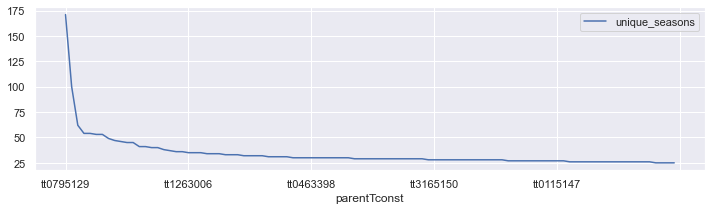

In [22]:
uniqueSeasons = (tvEpisodesFull2.loc[tvEpisodesFull2['parentTconst'] != 'tt0369117']
 .groupby('parentTconst')
 .agg(unique_seasons=('seasonNumber','nunique'))
)

(uniqueSeasons
 .sort_values(by='unique_seasons', ascending=False)
 .head(100)
 .plot(figsize=(12,3))
 .bar(color='b')
)

<AxesSubplot:ylabel='unique_seasons'>

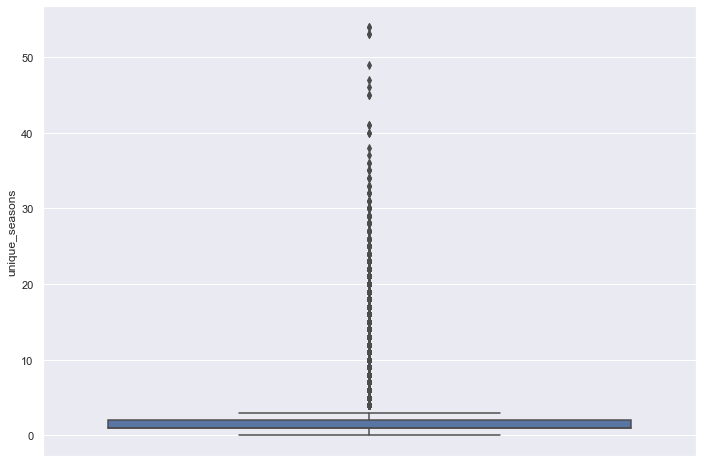

In [23]:
# Cut at the elbow
sns.boxplot(y = 'unique_seasons', 
            data = uniqueSeasons.loc[uniqueSeasons["unique_seasons"] <= 60])

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

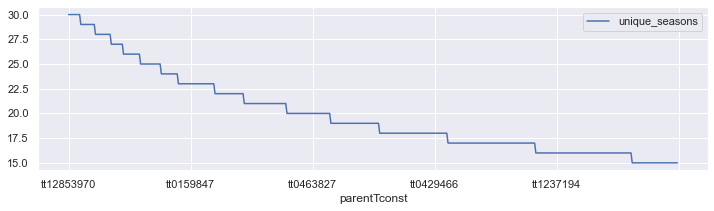

In [24]:
(uniqueSeasons.loc[uniqueSeasons['unique_seasons'] <= 30]
 .sort_values(by='unique_seasons', ascending=False)
 .head(500)
 .plot(figsize=(12,3))
 .bar(color='b')
)

In [25]:
#tvEpisodesFull2.loc[tvEpisodesFull2['parentTconst'] == 'tt0369117'].sort_values(by='seasonNumber', ascending=False)
tvEpisodesFull2.loc[tvEpisodesFull2['parentTconst'] == 'tt0795129'].sort_values(by='seasonNumber', ascending=False)
#tvSeries1990.loc[tvSeries1990['tconst'] == 'tt0369117']

,tconst_x,titleType_x,primaryTitle_x,originalTitle_x,isAdult_x,startYear_x,endYear_x,runtimeMinutes_x,genres_x,parentTconst,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
771719,tt6354974,tvEpisode,Pricey in Provence,Pricey in Provence,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771701,tt6150378,tvEpisode,Sink or Swim in Bonaire,Sink or Swim in Bonaire,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771698,tt6132008,tvEpisode,Raising a Family in Salzburg,Raising a Family in Salzburg,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771752,tt6924674,tvEpisode,Migrating South to Buy a Bed and Breakfast in ...,Migrating South to Buy a Bed and Breakfast in ...,0.0,NaN,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771751,tt6924670,tvEpisode,"Second Time in Puerto Penasco, Mexico","Second Time in Puerto Penasco, Mexico",0.0,NaN,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771696,tt6109640,tvEpisode,Episode dated 12 October 2016,Episode dated 12 October 2016,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771697,tt6129518,tvEpisode,Fear of Pests in Brisbane,Fear of Pests in Brisbane,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771709,tt6187192,tvEpisode,Living a Dream in France,Living a Dream in France,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771710,tt6201060,tvEpisode,Headed for the Gold Coast,Headed for the Gold Coast,0.0,2016.0,NaN,21.0,Reality-TV,tt0795129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question: Is there a relationship between TV Series age and imdb rating?
Answer: This analysis does not show any conclusive relationship; however, the range does tighten. That being said, the boxplot shows perhaps a decrease in ratings as the the series ages. 

Calculate the age of the series title from start date to end date. If there is no end date assume it is still on the air and use current year

In [26]:
tvSeries1990['age'] = tvSeries1990.apply(
    lambda x: 2021 - x['startYear'] if x['endYear'] == np.nan else x['endYear'] - x['startYear'], 
    axis=1)

<AxesSubplot:ylabel='age'>

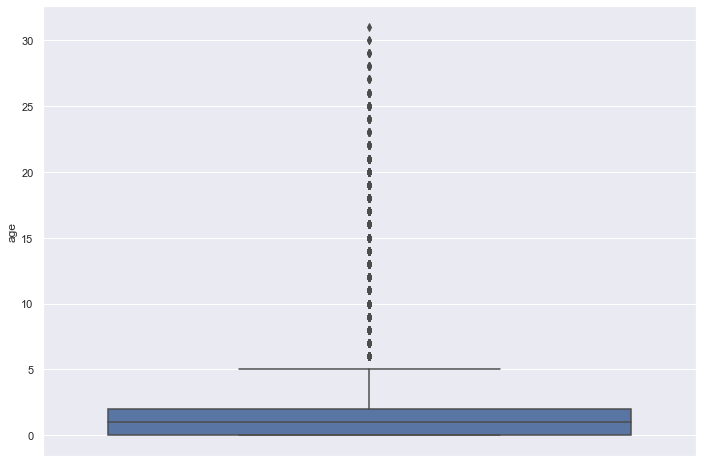

In [27]:
sns.boxplot(y = 'age', 
            data = tvSeries1990[['age']])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='averageRating'>

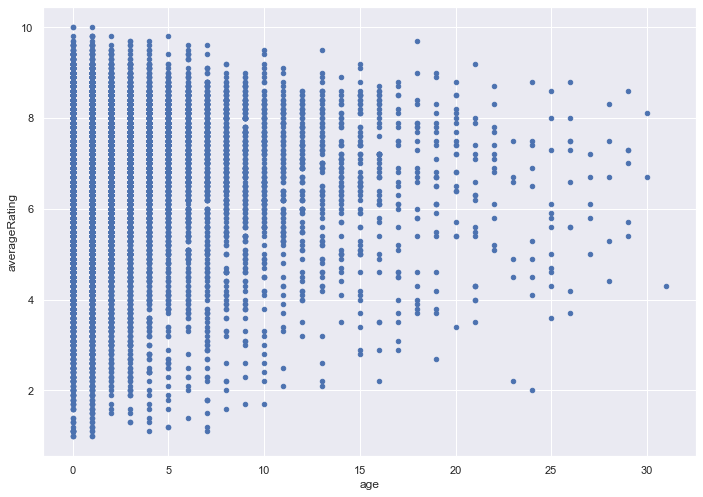

In [28]:
# Not surprisingly, there is no relationship between age and rating
tvSeries1990[['averageRating','age']].plot.scatter(x='age', y='averageRating')

<AxesSubplot:xlabel='age', ylabel='averageRating'>

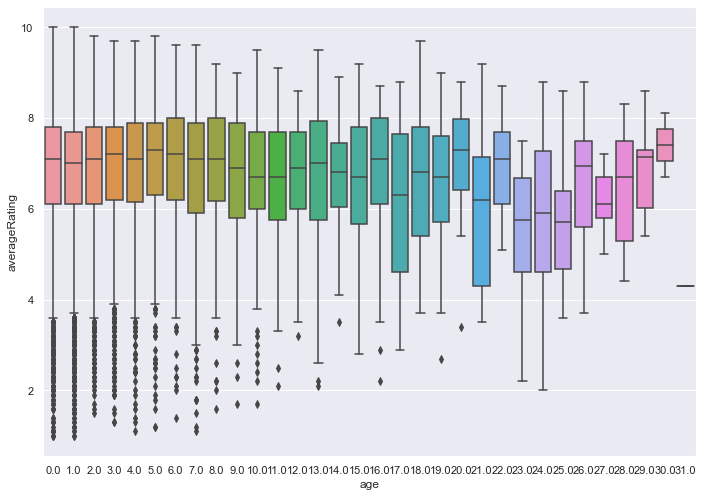

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'age', y = 'averageRating', 
            data = tvSeries1990[['age', 
                                 'averageRating']])

### Question: Do TV Series that receive a higher than average rating in seasons 1 and/or 2 have a longer life?
Answer: This analysis does not reveal a relationship much like the previous question. However, the very long running shows show higher than average 1st and 2nd season ratings.

Todo: 
* A regression analysis can reveal a causual relationship.
* More complicated season aggregation comparisons (for example: season 1 + season 2)

In [30]:
group_by_season = (tvEpisodesFull2
 .groupby(['parentTconst','seasonNumber'])
 .agg(avg_rating_by_season=('averageRating','mean'))
 #.reset_index()
 #.head()
 [['avg_rating_by_season']]
)

group_by_season = group_by_season.reset_index()
group_by_season.head()

,parentTconst,seasonNumber,avg_rating_by_season
0,tt0080217,1,NaN
1,tt0087305,1,NaN
2,tt0088472,1,NaN
3,tt0088473,1,NaN
4,tt0088655,1,6.833333


In [31]:
grp_season_age=group_by_season.merge(
    tvSeries1990[["tconst","age"]], 
    how='inner', 
    left_on='parentTconst', 
    right_on='tconst')

In [32]:
grp_season_age[grp_season_age['age'].isna()][['parentTconst']]

,parentTconst
0,tt0080217
9,tt0094547
10,tt0094547
11,tt0094547
12,tt0094547
...,...
191387,tt9916206
191389,tt9916380
191390,tt9916678
191391,tt9916678


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='avg_rating_by_season'>

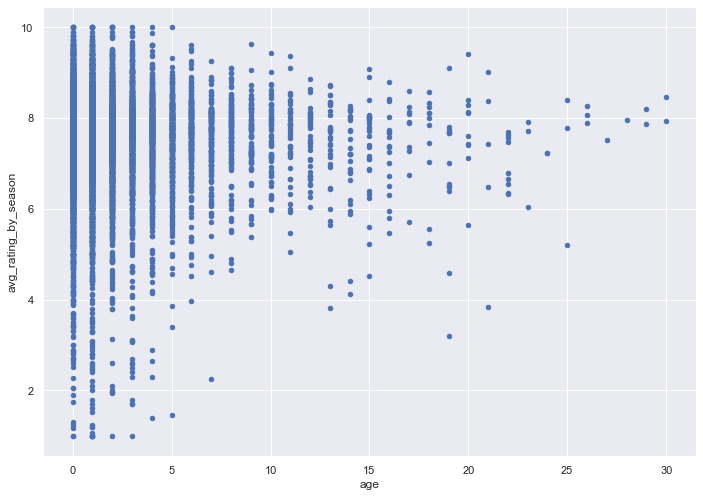

In [33]:
(grp_season_age[grp_season_age['seasonNumber']=='1'][['avg_rating_by_season','age']]
 .plot.scatter(x='age', y='avg_rating_by_season')
)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='avg_rating_by_season'>

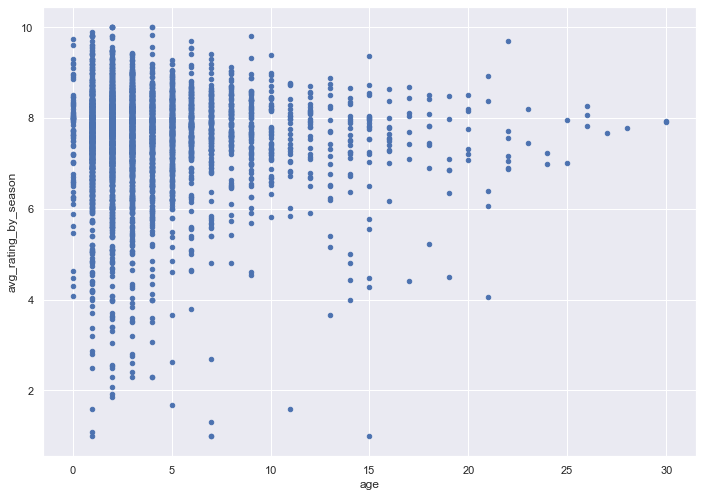

In [34]:
(grp_season_age[grp_season_age['seasonNumber']=='2'][['avg_rating_by_season','age']]
 .plot.scatter(x='age', y='avg_rating_by_season')
)

<AxesSubplot:xlabel='age', ylabel='avg_rating_by_season'>

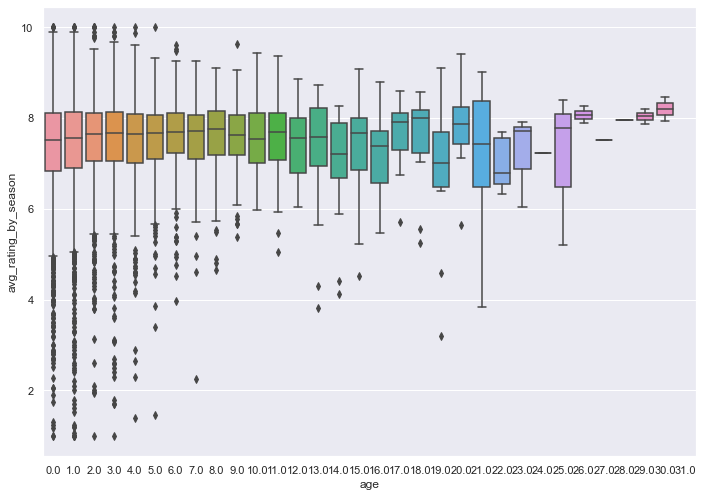

In [35]:
sns.boxplot(x='age', y='avg_rating_by_season', 
            data=grp_season_age[grp_season_age['seasonNumber']=='1'][['avg_rating_by_season','age']])

<AxesSubplot:xlabel='age', ylabel='avg_rating_by_season'>

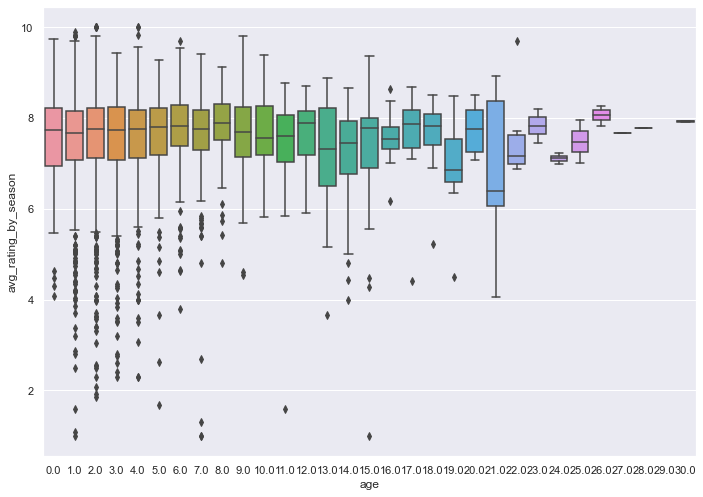

In [36]:
sns.boxplot(x='age', y='avg_rating_by_season', 
            data=grp_season_age[grp_season_age['seasonNumber']=='2'][['avg_rating_by_season','age']])

### Question: Is there a relationship between imdb scores and a series ending over time?
Answer: From this analysis the answer is inconclusive; however, further analysis could reveal a relationship. Keep executing this cell to plot the ratings by season for a random 20 TV series.

Todo: 
* Filter out series that are very short (e.g., < 5 seasons).
* Filter out series that are missing many values.

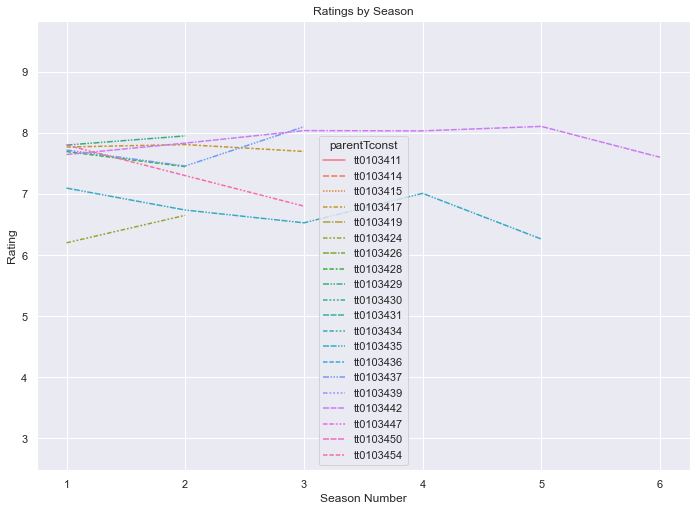

In [37]:
grp_season_age_pivot = pd.pivot_table(
    grp_season_age[['avg_rating_by_season','parentTconst','seasonNumber']], 
    values='avg_rating_by_season', 
    index='seasonNumber',
    columns='parentTconst', 
    aggfunc=np.mean)

grp_season_age_pivot.index = pd.to_numeric(
    grp_season_age_pivot.index, 
    errors='coerce')
grp_season_age_pivot = grp_season_age_pivot.sort_index()

import random

rand_start = random.randrange(0, len(grp_season_age_pivot.columns)-20)
fig = sns.lineplot(data=grp_season_age_pivot.iloc[0:50, rand_start:rand_start+20]) # limit to 50 seasons
plt.xlabel("Season Number")
plt.ylabel("Rating")
plt.title("Ratings by Season") 
plt.show(fig)

## Acknowledgements
* https://gist.github.com/Towhidn/ea3f8ad18116a2203d14b44620fe8d21
* https://datasets.imdbws.com/